#Chicago Crimes EDA

Objective:To Explore the data and find insights

Data Dictionary:

ID


Case Number

Date

Block

IUCR

Primary Type

Description

Location Description

Arrest

Domestic

Beat

District

Ward

Community Area

FBI Code

X Coordinate

Y Coordinate

Year

Updated On

Latitude

Longitude

Location

In [ ]:
import pandas as pd            # Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/2Crimes_-_2001_to_Present_20231103.csv.crdownload')        # Load the dataset

In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506703 entries, 0 to 506702
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    506703 non-null  int64  
 1   Case Number           506703 non-null  object 
 2   Date                  506703 non-null  object 
 3   Block                 506703 non-null  object 
 4   IUCR                  506703 non-null  object 
 5   Primary Type          506703 non-null  object 
 6   Description           506703 non-null  object 
 7   Location Description  503536 non-null  object 
 8   Arrest                506703 non-null  bool   
 9   Domestic              506703 non-null  bool   
 10  Beat                  506703 non-null  int64  
 11  District              506702 non-null  float64
 12  Ward                  506519 non-null  float64
 13  Community Area        506532 non-null  float64
 14  FBI Code              506703 non-null  object 
 15  

In [ ]:
df.shape

(506703, 22)

In [ ]:
df.size

11147466

In [ ]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [ ]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,506703.0,1.091810e+07,3.232310e+06,20847.000000,1.215935e+07,1.239038e+07,1.258552e+07,1.326269e+07
Beat,506703.0,1.165541e+03,7.052821e+02,111.000000,6.120000e+02,1.032000e+03,1.724000e+03,2.535000e+03
District,506702.0,1.131046e+01,7.023798e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,506519.0,2.303568e+01,1.395698e+01,1.000000,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,506532.0,3.703805e+01,2.164363e+01,0.000000,2.300000e+01,3.200000e+01,5.500000e+01,7.700000e+01
X Coordinate,490587.0,1.165000e+06,1.657090e+04,0.000000,1.153360e+06,1.166720e+06,1.176699e+06,1.205119e+06
Y Coordinate,490587.0,1.886058e+06,3.211618e+04,0.000000,1.858635e+06,1.891309e+06,1.909599e+06,1.951503e+06
Year,506703.0,2.017994e+03,6.477407e+00,2001.000000,2.020000e+03,2.021000e+03,2.021000e+03,2.023000e+03
Latitude,490586.0,4.184293e+01,8.833232e-02,36.619446,4.176741e+01,4.185728e+01,4.190766e+01,4.202255e+01
Longitude,490586.0,-8.767003e+01,6.025133e-02,-91.686566,-8.771234e+01,-8.766383e+01,-8.762722e+01,-8.752453e+01


In [ ]:
df.describe(include=[np.object]).T

<ipython-input-10-8b4509b3963c>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object]).T


,count,unique,top,freq
Case Number,506703,506700,JG446325,2
Date,506703,274715,01/01/2021 12:00:00 AM,110
Block,506703,31693,001XX N STATE ST,969
IUCR,506703,354,0486,44370
Primary Type,506703,33,THEFT,102249
Description,506703,459,SIMPLE,57574
Location Description,503536,147,STREET,128724
FBI Code,506703,27,06,102249
Updated On,506703,3225,01/03/2023 03:40:27 PM,85583
Location,490586,204901,"(41.976290414, -87.905227221)",662


# Checking the null values

In [ ]:
df.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     3167
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                      184
Community Area            171
FBI Code                    0
X Coordinate            16116
Y Coordinate            16116
Year                        0
Updated On                  0
Latitude                16117
Longitude               16117
Location                16117
dtype: int64

In [ ]:
null_pct=(df.isnull().sum())/df.shape[0]

In [ ]:
null_pct

ID                      0.000000
Case Number             0.000000
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.006250
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000002
Ward                    0.000363
Community Area          0.000337
FBI Code                0.000000
X Coordinate            0.031806
Y Coordinate            0.031806
Year                    0.000000
Updated On              0.000000
Latitude                0.031808
Longitude               0.031808
Location                0.031808
dtype: float64

In [ ]:
df.dropna(inplace=True)            # Dropping the null values using dropna function

In [ ]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [ ]:
df['Location'].value_counts()

(41.976290414, -87.905227221)    662
(41.883500187, -87.627876698)    482
(41.754592961, -87.741528537)    449
(41.884335468, -87.619164088)    367
(41.788987036, -87.74147999)     360
                                ... 
(41.937370428, -87.764003625)      1
(41.901228115, -87.685172413)      1
(41.900185639, -87.669854516)      1
(41.756107823, -87.57730741)       1
(41.921797036, -87.798851312)      1
Name: Location, Length: 204382, dtype: int64

In [ ]:
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
11,12045583,JD226426,05/07/2020 10:24:00 AM,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,3.0,35.0,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
12,12031001,JD209965,04/16/2020 05:00:00 AM,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11.0,60.0,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"


In [ ]:
df.groupby('Primary Type')['Arrest'].sum().to_frame().reset_index()

,Primary Type,Arrest
0,ARSON,95
1,ASSAULT,5015
2,BATTERY,15261
3,BURGLARY,947
4,CONCEALED CARRY LICENSE VIOLATION,305
5,CRIM SEXUAL ASSAULT,59
6,CRIMINAL DAMAGE,2635
7,CRIMINAL SEXUAL ASSAULT,146
8,CRIMINAL TRESPASS,5054
9,DECEPTIVE PRACTICE,1189


In [ ]:
df[df.duplicated()].sum()

ID                      0.0
Case Number             0.0
Date                    0.0
Block                   0.0
IUCR                    0.0
Primary Type            0.0
Description             0.0
Location Description    0.0
Arrest                  0.0
Domestic                0.0
Beat                    0.0
District                0.0
Ward                    0.0
Community Area          0.0
FBI Code                0.0
X Coordinate            0.0
Y Coordinate            0.0
Year                    0.0
Updated On              0.0
Latitude                0.0
Longitude               0.0
Location                0.0
dtype: float64

In [ ]:
df.Year.value_counts()

2021    201206
2005     92186
2022     85851
2020     65269
2023     37023
2006      5082
2019       905
2004       470
2009       238
2008       162
2015       109
2018        87
2003        75
2014        62
2002        50
2016        42
2017        36
2001        34
2010        24
2013        21
2011        16
2012        14
2007        12
Name: Year, dtype: int64

In [ ]:
df.nunique()

ID                      488974
Case Number             488971
Date                    265574
Block                    30935
IUCR                       350
Primary Type                33
Description                454
Location Description       147
Arrest                       2
Domestic                     2
Beat                       304
District                    23
Ward                        50
Community Area              77
FBI Code                    27
X Coordinate             59689
Y Coordinate             91281
Year                        23
Updated On                2064
Latitude                204302
Longitude               204266
Location                204382
dtype: int64

In [ ]:
df.Arrest.value_counts()

False    410810
True      78164
Name: Arrest, dtype: int64

In [ ]:
df.District.value_counts()

8.0     31851
6.0     30676
11.0    30138
4.0     28742
25.0    26600
12.0    25777
3.0     25042
7.0     25031
2.0     23172
18.0    22825
19.0    22604
9.0     22333
5.0     21909
1.0     21760
10.0    21109
15.0    18633
16.0    17786
14.0    16608
24.0    16492
22.0    16186
17.0    13907
20.0     9769
31.0       24
Name: District, dtype: int64

<Axes: xlabel='Arrest', ylabel='count'>

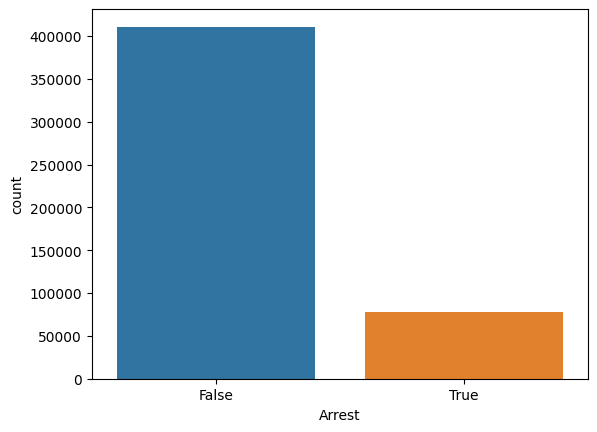

In [ ]:
sns.countplot(x='Arrest',data=df)

.We can Observe that Number of Arrest as True is very less compared to False

<Axes: xlabel='District', ylabel='count'>

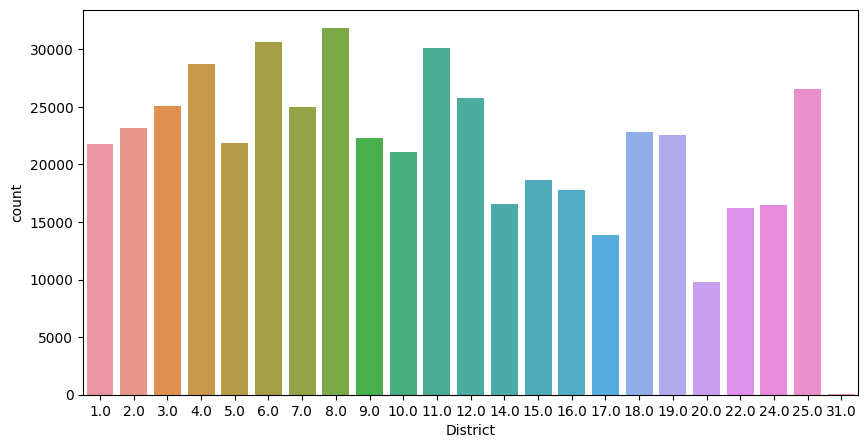

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='District',data=df)

.We can observe that the crime rate for the district 8.0 is the highest.

.We can observe that the crime rate is lowest for the district 20.0.

.Also, we can observe that the crime rate from the districts 1.0 to 11.0 is high compare to the rest of the districts.

In [ ]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
df.Year.dtypes

dtype('int64')

In [ ]:
df.Year.value_counts()

2021    201206
2005     92186
2022     85851
2020     65269
2023     37023
2006      5082
2019       905
2004       470
2009       238
2008       162
2015       109
2018        87
2003        75
2014        62
2002        50
2016        42
2017        36
2001        34
2010        24
2013        21
2011        16
2012        14
2007        12
Name: Year, dtype: int64

In [ ]:
df['Year']=df['Year'].astype(int)       # converting the data type of date from float data type to int

In [ ]:
df.Year.dtypes

dtype('int64')

In [ ]:
df.Year.value_counts()

2021    201206
2005     92186
2022     85851
2020     65269
2023     37023
2006      5082
2019       905
2004       470
2009       238
2008       162
2015       109
2018        87
2003        75
2014        62
2002        50
2016        42
2017        36
2001        34
2010        24
2013        21
2011        16
2012        14
2007        12
Name: Year, dtype: int64

In [ ]:
df.Arrest.value_counts()

False    410810
True      78164
Name: Arrest, dtype: int64

In [ ]:
True_Arrest=df[df['Arrest']==True]     # Filtering the Arrest column where Arrest is True

In [ ]:
True_Arrest

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
12,12031001,JD209965,04/16/2020 05:00:00 AM,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11.0,60.0,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"
13,12093529,JD282112,07/01/2020 10:16:00 AM,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,7.0,46.0,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)"
19,12126129,JD321064,08/04/2020 08:28:00 PM,081XX S LOOMIS BLVD,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,21.0,71.0,15,1168412.0,1850836.0,2020,08/11/2020 03:42:53 PM,41.746221,-87.658477,"(41.746220584, -87.658477307)"
27,12067286,JD251718,06/02/2020 10:00:00 PM,042XX S EMERALD AVE,0820,THEFT,$500 AND UNDER,STREET,True,False,...,11.0,61.0,06,1172009.0,1876708.0,2020,06/09/2020 03:43:29 PM,41.817138,-87.644538,"(41.817138145, -87.644537728)"
28,4229528,HL545852,08/12/2005 11:00:00 PM,063XX S COTTAGE GROVE AVE,3730,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING JUSTICE,SIDEWALK,True,False,...,20.0,42.0,24,1182654.0,1863077.0,2005,02/28/2018 03:56:25 PM,41.779493,-87.605913,"(41.779492755, -87.605912536)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506629,12822730,JF390577,09/10/2022 09:00:00 AM,114XX S FOREST AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,...,9.0,49.0,07,1180296.0,1828874.0,2022,01/03/2023 03:40:27 PM,41.685690,-87.615603,"(41.685690015, -87.615602787)"
506632,12741925,JF294276,06/26/2022 02:25:00 AM,036XX W MARQUETTE RD,143B,WEAPONS VIOLATION,UNLAWFUL POSSESSION - OTHER FIREARM,STREET,True,False,...,13.0,65.0,15,1153206.0,1859936.0,2022,01/03/2023 03:40:27 PM,41.771506,-87.713956,"(41.771506222, -87.713955875)"
506639,12716034,JF262727,05/31/2022 05:29:00 PM,003XX S KILBOURN AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,ALLEY,True,False,...,28.0,26.0,15,1146443.0,1898098.0,2022,01/03/2023 03:40:27 PM,41.876359,-87.737777,"(41.87635924, -87.737777423)"
506646,12643513,JF175293,03/15/2022 08:41:00 PM,100XX W OHARE ST,1335,CRIMINAL TRESPASS,TO AIRPORT,AIRPORT EXTERIOR - SECURE AREA,True,False,...,41.0,76.0,26,1100658.0,1934241.0,2022,01/03/2023 03:40:27 PM,41.976290,-87.905227,"(41.976290414, -87.905227221)"


<Axes: xlabel='District', ylabel='count'>

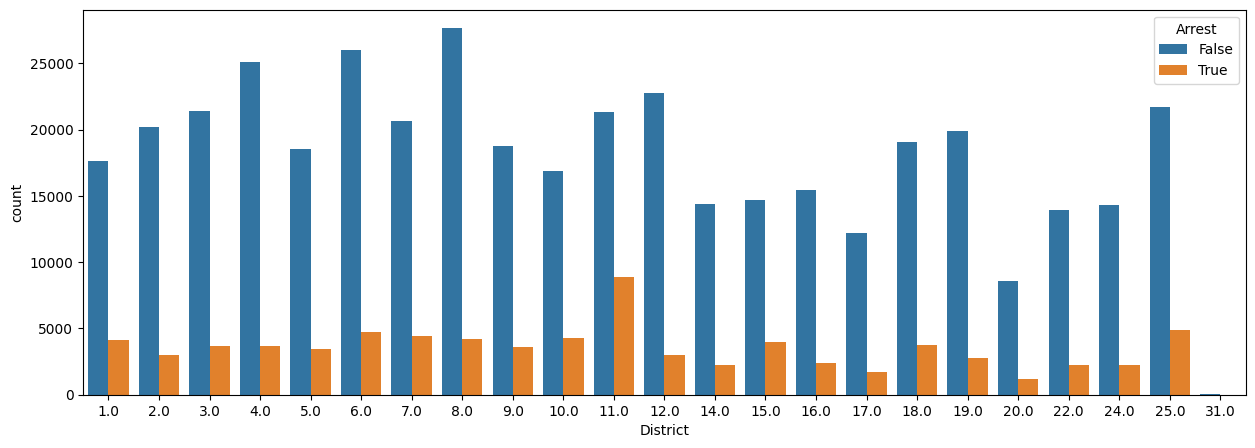

In [ ]:
 plt.figure(figsize=(15,5))
sns.countplot(x='District',hue='Arrest',data=df)

.We can observe that, in all the districts the arrest count as False is very much high compared to True.

.We can observe that the highest arrest value as False is highest for district 8.0 and highest True value is for district 11.0. This also indicates the crime is high in the district 8.0

.We can observe that the lowest arrest value as True and false both is district 20.0.. This also indicates the crime is low in district 20.0

In [ ]:
df.Description.nunique()

454

In [ ]:
df.groupby('Arrest')['Description'].value_counts()

Arrest  Description                                  
False   SIMPLE                                           50768
        DOMESTIC BATTERY SIMPLE                          36459
        $500 AND UNDER                                   35684
        OVER $500                                        29669
        TO VEHICLE                                       27987
                                                         ...  
True    UNIDENTIFIABLE RECORDING SOUND                       1
        UNLAWFUL SALE - DELIVERY OF FIREARM AT SCHOOL        1
        UNLAWFUL SALE - OTHER FIREARM                        1
        UNLAWFUL SALE HANDGUN                                1
        UNLAWFUL USE OF A COMPUTER                           1
Name: Description, Length: 787, dtype: int64

<Axes: >

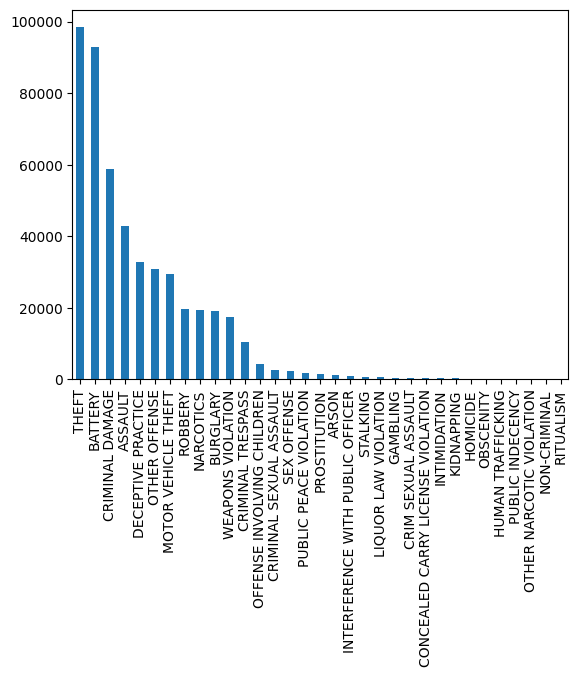

In [ ]:
df['Primary Type'].value_counts().plot(kind='bar')

In [ ]:
df['Primary Type'].unique()

array(['THEFT', 'BATTERY', 'ASSAULT', 'WEAPONS VIOLATION',
       'OTHER OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER', 'BURGLARY',
       'NARCOTICS', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'DECEPTIVE PRACTICE', 'OFFENSE INVOLVING CHILDREN',
       'CRIMINAL TRESPASS', 'ROBBERY', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'INTIMIDATION', 'OBSCENITY',
       'CRIM SEXUAL ASSAULT', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION', 'RITUALISM'],
      dtype=object)

.We can observe **THEFT** is the major type of crime followed by **BATTERY** and **CRIMINAL DAMAGES**.

.We can observe that **CONCEALED CARRY LICENSE VIOLATION,OBSCENITY,OTHER NARCOTIC VIOLATION,HUMAN TRAFFICKING,PUBLIC INDECENCY,NON-CRIMINAL,RITUALISM** is almost null.

<Axes: >

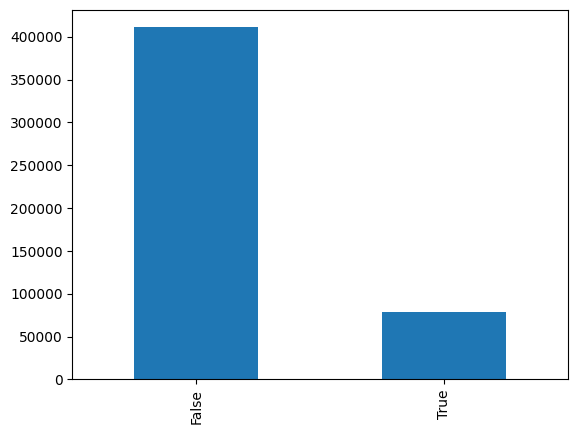

In [ ]:
df.Arrest.value_counts().plot(kind='bar')

# Correlation between variables

In [ ]:
corr=df.corr()

<ipython-input-41-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

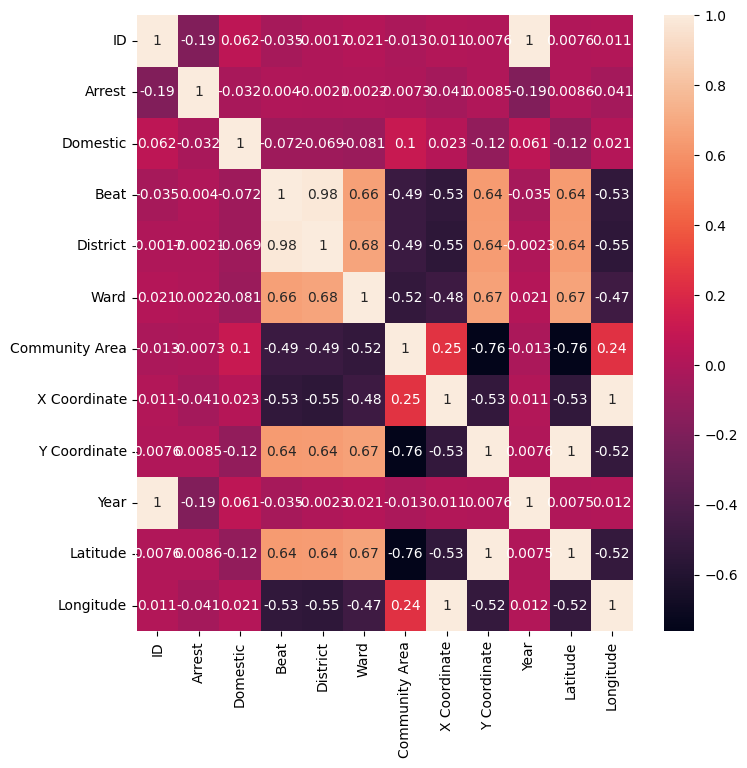

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

In [ ]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
df['Location Description'].value_counts().head(10)

STREET                                    127440
APARTMENT                                  88841
RESIDENCE                                  77083
SIDEWALK                                   31880
PARKING LOT / GARAGE (NON RESIDENTIAL)     12503
SMALL RETAIL STORE                         12195
ALLEY                                      10921
RESTAURANT                                  8412
VEHICLE NON-COMMERCIAL                      8244
GAS STATION                                 6870
Name: Location Description, dtype: int64

Text(0.5, 1.0, 'Top 10 Location of Crime')

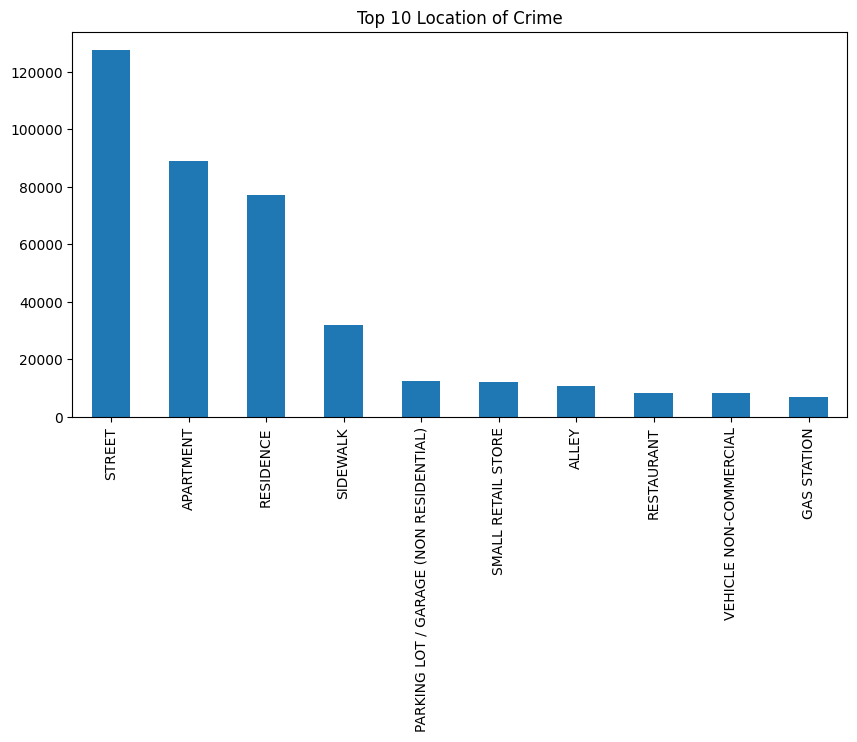

In [ ]:
plt.figure(figsize=(10,5))
df['Location Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Location of Crime')

.we can observe the Location where crime rate is highest is street.

In [ ]:
Loc_group=df.groupby('Location Description')['Primary Type'].unique().to_frame().reset_index()

In [ ]:
Loc_group.head(10)

,Location Description,Primary Type
0,ABANDONED BUILDING,"[CRIMINAL DAMAGE, ASSAULT, BURGLARY, WEAPONS V..."
1,AIRCRAFT,"[PUBLIC PEACE VIOLATION, BATTERY, CRIMINAL TRE..."
2,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,"[THEFT, BATTERY, DECEPTIVE PRACTICE, MOTOR VEH..."
3,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,"[DECEPTIVE PRACTICE, OTHER OFFENSE, THEFT, NAR..."
4,AIRPORT EXTERIOR - NON-SECURE AREA,"[THEFT, BATTERY, ASSAULT, MOTOR VEHICLE THEFT,..."
5,AIRPORT EXTERIOR - SECURE AREA,"[CRIMINAL TRESPASS, THEFT, CRIMINAL DAMAGE, DE..."
6,AIRPORT PARKING LOT,"[BATTERY, THEFT, DECEPTIVE PRACTICE, CRIMINAL ..."
7,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,"[THEFT, BATTERY, NARCOTICS, CRIMINAL DAMAGE, C..."
8,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,"[DECEPTIVE PRACTICE, THEFT, BATTERY, CONCEALED..."
9,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,"[THEFT, PUBLIC PEACE VIOLATION, ASSAULT, CONCE..."


In [ ]:
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
11,12045583,JD226426,05/07/2020 10:24:00 AM,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,3.0,35.0,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
12,12031001,JD209965,04/16/2020 05:00:00 AM,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11.0,60.0,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"


In [ ]:
df.groupby('Date')['Primary Type'].unique().to_frame()

,Primary Type
Date,
01/01/2001 08:30:00 AM,[THEFT]
01/01/2001 09:00:00 AM,[THEFT]
01/01/2001 11:59:00 PM,[THEFT]
01/01/2001 12:00:00 AM,"[THEFT, DECEPTIVE PRACTICE]"
01/01/2001 12:00:00 PM,[THEFT]
...,...
12/31/2021 12:43:00 PM,[ASSAULT]
12/31/2021 12:45:00 PM,"[CONCEALED CARRY LICENSE VIOLATION, ASSAULT]"
12/31/2021 12:46:00 PM,[ASSAULT]


In [ ]:
df.Date.value_counts().sort_values(ascending=False).head().to_frame().plot(kind=)

,Date
01/01/2021 12:00:00 AM,92
01/01/2022 12:00:00 AM,65
03/01/2021 12:00:00 AM,52
04/01/2021 12:00:00 AM,51
06/01/2021 12:00:00 AM,44


In [ ]:
df.groupby('Date')['Arrest'].value_counts().to_frame()

Arrest
Date                   Arrest        
01/01/2001 08:30:00 AM False        1
01/01/2001 09:00:00 AM False        1
                       True         1
01/01/2001 11:59:00 PM False        1
01/01/2001 12:00:00 AM False        3
...                               ...
12/31/2021 12:45:00 PM False        1
                       True         1
12/31/2021 12:46:00 PM False        1
12/31/2021 12:49:00 AM False        1
12/31/2021 12:55:00 AM False        1

[286131 rows x 1 columns]

In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
11,12045583,JD226426,05/07/2020 10:24:00 AM,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,3.0,35.0,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
12,12031001,JD209965,04/16/2020 05:00:00 AM,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11.0,60.0,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"
13,12093529,JD282112,07/01/2020 10:16:00 AM,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,7.0,46.0,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)"
14,12178140,JD381597,09/27/2020 11:29:00 PM,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,15.0,67.0,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)"
15,4144897,HL474854,07/10/2005 03:00:00 PM,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,16.0,68.0,04B,1170050.0,1863524.0,2005,02/28/2018 03:56:25 PM,41.781003,-87.652107,"(41.781002663, -87.652107119)"


In [ ]:
df.groupby('Date')['Description'].value_counts().sort_values(ascending=False).to_frame().head()

,,Description
Date,Description,
01/20/2021 09:00:00 AM,FINANCIAL IDENTITY THEFT $300 AND UNDER,22
10/25/2020 12:00:00 AM,FINANCIAL IDENTITY THEFT $300 AND UNDER,20
12/18/2020 12:00:00 PM,FINANCIAL IDENTITY THEFT $300 AND UNDER,18
10/18/2020 12:00:00 AM,FINANCIAL IDENTITY THEFT $300 AND UNDER,17
01/20/2021 12:00:00 PM,FINANCIAL IDENTITY THEFT $300 AND UNDER,17


In [69]:
df['Date']=pd.to_datetime(df['Date'])

In [72]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [73]:
df['dateonly']=df.Date.dt.date
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,dateonly
11,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,35.0,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)",2020-05-07
12,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,60.0,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)",2020-04-16
13,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,46.0,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)",2020-07-01
14,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,67.0,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)",2020-09-27
15,4144897,HL474854,2005-07-10 15:00:00,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,68.0,04B,1170050.0,1863524.0,2005,02/28/2018 03:56:25 PM,41.781003,-87.652107,"(41.781002663, -87.652107119)",2005-07-10


In [77]:
df['time']=df.Date.dt.time

In [78]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,dateonly,time
11,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)",2020-05-07,10:24:00
12,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)",2020-04-16,05:00:00
13,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)",2020-07-01,10:16:00
14,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,...,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)",2020-09-27,23:29:00
15,4144897,HL474854,2005-07-10 15:00:00,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,04B,1170050.0,1863524.0,2005,02/28/2018 03:56:25 PM,41.781003,-87.652107,"(41.781002663, -87.652107119)",2005-07-10,15:00:00


In [79]:
df.dateonly.value_counts()

2005-10-31    945
2005-10-20    909
2005-10-05    900
2005-10-21    887
2005-09-20    884
             ... 
2019-09-13      1
2019-09-15      1
2019-10-12      1
2009-03-16      1
2015-09-28      1
Name: dateonly, Length: 2913, dtype: int64

In [80]:
df.time.value_counts()

00:00:00    15481
12:00:00    12492
09:00:00     9876
18:00:00     8487
15:00:00     8456
            ...  
12:46:11        1
10:23:21        1
19:26:49        1
17:22:47        1
19:44:47        1
Name: time, Length: 16911, dtype: int64

In [81]:
df.time.max()

datetime.time(23, 59, 59)

.The maximum crimes took place at time->23:59:59

In [82]:
df.time.min()

datetime.time(0, 0)

In [83]:
df.dateonly.max()

datetime.date(2023, 10, 25)

.The maximum crimes took place on 25-10-2023

In [85]:
df.dateonly.min()

datetime.date(2001, 1, 1)

.The minimum crimes took place on 1-1-2001